# Live Lecture: Modifying Numpy Arrays

## (A). Indexing Warmup

Suppose that we have some data with some zero values. 

In [2]:
import numpy as np

# fake data
x = np.random.rand(20)

# determine indices with 0 values

ix = np.array([7, 3, 9, 18])

# set some values = 0

x[ix] = 0

x

array([0.38344796, 0.01069954, 0.70957159, 0.        , 0.27719117,
       0.15613486, 0.04313867, 0.        , 0.96164272, 0.        ,
       0.7378619 , 0.90796422, 0.55598789, 0.17216241, 0.71202177,
       0.36949377, 0.70123131, 0.46344565, 0.        , 0.96269787])

However, our experimenter wasn't very careful: zero values should actually be ignored in calculation. We'd like to replace the zero values with `np.nan`. What's the simplest way to do this? 

In [5]:
x[x == 0] = np.nan

In [9]:
# follow up: compute the mean
np.nanmean(x)

0.5077933311617073

In [ ]:
# alternative (less versatile)



## (B). Modifying Images

In this example, we'll take an XKCD comic and make it purple. In literature and film, this is called "being drunk with power." 

In [40]:
import matplotlib.image as mpimg

url = 'https://imgs.xkcd.com/comics/depth_and_breadth_2x.png'

comic = mpimg.imread(url)

In [41]:
# width 749px X height 962px, with 3 RGB channels
comic.shape

(962, 749, 3)

In [42]:
# RGB color system: (R, G, B)
# Red Green Blue
# comic[i,j] gives the 3 RGB values for pixel in 
# row i and column j

# [0, 0, 0] means black
comic[1,1]

array([0., 0., 0.], dtype=float32)

In [43]:
# [1, 1, 1] means white
comic[10, 20]

array([1., 1., 1.], dtype=float32)

(-0.5, 748.5, 961.5, -0.5)

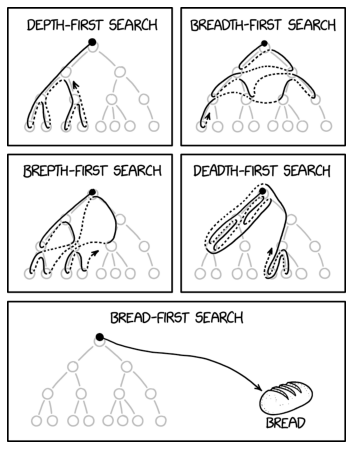

In [44]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, figsize = (8,8))
ax.imshow(comic)
ax.axis("off")

In [48]:
# create a "mask" indicating which 
# pixels are shaded
# boolean array, dimensions height x width
# white pixels: [0, 0, 0]
# test: is largest RGB value > 0

# mask = (comic == [0,0,0]).max(axis = 2)
# mask.shape

(comic == [0,0,0]).max(axis = 2)

array([[False, False,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True, False],
       [False, False,  True, ...,  True, False, False]])

In [29]:
# a pleasant purple
purple = np.array([[0.4, 0.2, 0.7]])
comic[mask] = purple

(-0.5, 748.5, 961.5, -0.5)

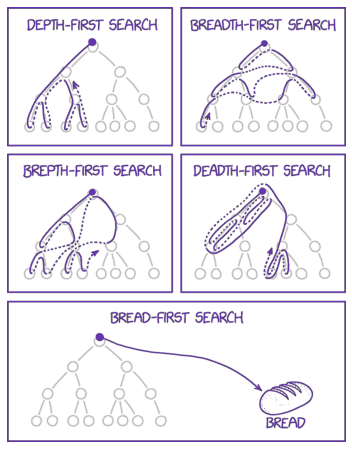

In [30]:
fig, ax = plt.subplots(1, figsize = (8,8))
ax.imshow(comic)
ax.axis("off")

In [31]:
def recolor(img, color):
    mask = (img == [0,0,0]).max(axis = 2)
    img[mask] = color
    return img

(-0.5, 1223.5, 801.5, -0.5)

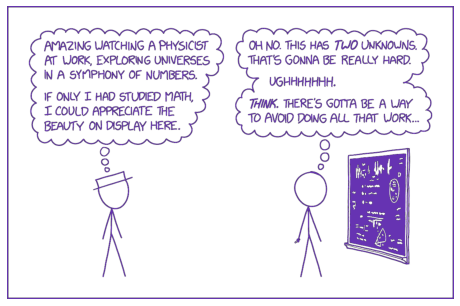

In [34]:
url2 = 'https://imgs.xkcd.com/comics/math_work_2x.png'
comic2 = mpimg.imread(url2)

fig, ax = plt.subplots(1, figsize = (8,8))
ax.imshow(recolor(comic2, purple))
ax.axis("off")

(-0.5, 1223.5, 801.5, -0.5)

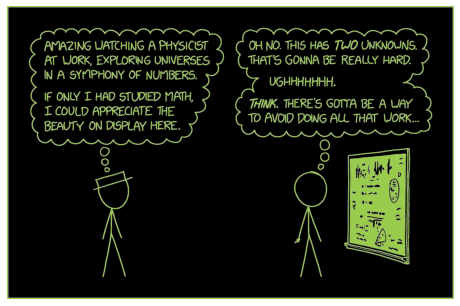

In [36]:
fig, ax = plt.subplots(1, figsize = (8,8))
ax.imshow(1 - recolor(comic2, purple))
ax.axis("off")